In [1]:
import pandas as pd
from sqlalchemy import create_engine
import requests
from bs4 import BeautifulSoup
import re

In [2]:
# connection database
sqlitedb_rel_path = '../data/raw_data_project_m1.db'

conn_str = f'sqlite:///{sqlitedb_rel_path}'

engine = create_engine(conn_str)


In [3]:
# list all tables in database
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", engine)

,name
0,personal_info
1,country_info
2,career_info
3,poll_info


## Personal_info table

In [4]:
personal_info = pd.read_sql_query("select * from personal_info", engine)
personal_info.head(10)

,uuid,age,gender,dem_has_children,age_group
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61 years old,male,NO,40_65
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57 years old,male,yES,40_65
2,83127080-da3d-0133-c74f-0a81e8b09a82,32 years old,male,nO,26_39
3,15626d40-db13-0133-ea5c-0a81e8b09a82,45 years old,Male,YES,40_65
4,24954a70-db98-0133-4a64-0a81e8b09a82,41 years old,Fem,yES,40_65
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,1990,FeMale,NO,26_39
6,b50dbb80-da53-0133-8956-0a81e8b09a82,1990,Fem,NO,26_39
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,47 years old,Male,NO,40_65
8,4fde2370-da48-0133-3a42-0a81e8b09a82,34 years old,FeMale,nO,26_39
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,1994,female,yES,juvenile


## Country info

In [5]:
country_info = pd.read_sql_query("SELECT * FROM country_info", engine)
country_info.head(10) 

,uuid,country_code,rural
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,countryside
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,urban
2,83127080-da3d-0133-c74f-0a81e8b09a82,AT,city
3,15626d40-db13-0133-ea5c-0a81e8b09a82,AT,Country
4,24954a70-db98-0133-4a64-0a81e8b09a82,AT,city
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,AT,countryside
6,b50dbb80-da53-0133-8956-0a81e8b09a82,AT,urban
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,AT,urban
8,4fde2370-da48-0133-3a42-0a81e8b09a82,AT,city
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,AT,urban


## Career info

In [6]:
career_info = pd.read_sql_query("SELECT * FROM career_info", engine)
career_info.head(10)

,uuid,dem_education_level,dem_full_time_job,normalized_job_code
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,None
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0
2,83127080-da3d-0133-c74f-0a81e8b09a82,None,no,None
3,15626d40-db13-0133-ea5c-0a81e8b09a82,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c
4,24954a70-db98-0133-4a64-0a81e8b09a82,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,high,yes,27af8700f5577cec835acee2cb90a2ff
6,b50dbb80-da53-0133-8956-0a81e8b09a82,medium,no,None
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,medium,yes,c1b670eba9ccb65e7c99f7da116d5b9c
8,4fde2370-da48-0133-3a42-0a81e8b09a82,medium,yes,d71c4164c99a5f9bca773e755a72f40f
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,no,no,None


## Poll info

In [7]:
poll_info = pd.read_sql_query("SELECT * FROM poll_info", engine)
poll_info.head(10)

,uuid,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,I know something about it,I would not vote,None of the above,None of the above,None of the above
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working
2,83127080-da3d-0133-c74f-0a81e8b09a82,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...
3,15626d40-db13-0133-ea5c-0a81e8b09a82,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above
4,24954a70-db98-0133-4a64-0a81e8b09a82,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,I understand it fully,I would vote against it,A basic income would not affect my work choices,It encourages financial independence and self-...,It is impossible to finance | It might encoura...
6,b50dbb80-da53-0133-8956-0a81e8b09a82,I know something about it,I would probably vote for it,‰Û_ work as a freelancer,It reduces anxiety about financing basic needs,Foreigners might come to my country and take a...
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,I know something about it,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working | Fo...
8,4fde2370-da48-0133-3a42-0a81e8b09a82,I have heard just a little about it,I would probably vote for it,None of the above,It creates more equality of opportunity | It r...,Foreigners might come to my country and take a...
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,I understand it fully,I would vote for it,‰Û_ do more volunteering work,"It increases solidarity, because it is funded ...",Foreigners might come to my country and take a...


In [8]:
#cojo las 3 columnas que me piden-->país, trabajo y rural

query="""SELECT country_info.country_code,
        career_info.normalized_job_code,
        country_info.rural,
        country_info.uuid
        FROM poll_info 
        JOIN career_info ON poll_info.uuid = career_info.uuid 
        JOIN country_info ON poll_info.uuid = country_info.uuid"""

merge_data = pd.read_sql_query(query,engine)
merge_data

,country_code,normalized_job_code,rural,uuid
0,AT,None,countryside,f6e7ee00-deac-0133-4de8-0a81e8b09a82
1,AT,861a9b9151e11362eb3c77ca914172d0,urban,54f0f1c0-dda1-0133-a559-0a81e8b09a82
2,AT,None,city,83127080-da3d-0133-c74f-0a81e8b09a82
3,AT,049a3f3a2b5f85cb2971ba77ad66e10c,Country,15626d40-db13-0133-ea5c-0a81e8b09a82
4,AT,f4b2fb1aa40f661488e2782b6d57ad2f,city,24954a70-db98-0133-4a64-0a81e8b09a82
...,...,...,...,...
9644,SK,847165cfda6b1dc82ae22b967da8af2f,urban,7d1ac020-dcb4-0133-817a-0a81e8b09a82
9645,SK,a4d5b8b38f9513825d0d94a981ebe962,urban,39f989f0-db52-0133-8482-0a81e8b09a82
9646,SK,None,Non-Rural,70ce4a90-d965-0133-f5e4-0a81e8b09a82
9647,SK,775190277a849cba701b306a7b374c0a,city,2896e440-db3c-0133-5b67-0a81e8b09a82


In [9]:
merge_data.isnull().any()

country_code           False
normalized_job_code     True
rural                  False
uuid                   False
dtype: bool

In [10]:
count=0
for i in merge_data['normalized_job_code']:
    if i==None:
        merge_data.loc[count,'normalized_job_code']='Unemployed'
    count+=1

merge_data

,country_code,normalized_job_code,rural,uuid
0,AT,Unemployed,countryside,f6e7ee00-deac-0133-4de8-0a81e8b09a82
1,AT,861a9b9151e11362eb3c77ca914172d0,urban,54f0f1c0-dda1-0133-a559-0a81e8b09a82
2,AT,Unemployed,city,83127080-da3d-0133-c74f-0a81e8b09a82
3,AT,049a3f3a2b5f85cb2971ba77ad66e10c,Country,15626d40-db13-0133-ea5c-0a81e8b09a82
4,AT,f4b2fb1aa40f661488e2782b6d57ad2f,city,24954a70-db98-0133-4a64-0a81e8b09a82
...,...,...,...,...
9644,SK,847165cfda6b1dc82ae22b967da8af2f,urban,7d1ac020-dcb4-0133-817a-0a81e8b09a82
9645,SK,a4d5b8b38f9513825d0d94a981ebe962,urban,39f989f0-db52-0133-8482-0a81e8b09a82
9646,SK,Unemployed,Non-Rural,70ce4a90-d965-0133-f5e4-0a81e8b09a82
9647,SK,775190277a849cba701b306a7b374c0a,city,2896e440-db3c-0133-5b67-0a81e8b09a82


In [11]:
merge_data['rural'].unique()

array(['countryside', 'urban', 'city', 'Country', 'rural', 'Non-Rural'],
      dtype=object)

In [12]:
merge_data['rural'] = merge_data['rural'].str.capitalize()
merge_data['rural'] = merge_data['rural'].replace('City', 'Urban')
merge_data['rural'] = merge_data['rural'].replace('Non-rural', 'Urban')
merge_data['rural'] = merge_data['rural'].replace('Countryside', 'Rural')
merge_data['rural'] = merge_data['rural'].replace('Country', 'Rural')
merge_data

,country_code,normalized_job_code,rural,uuid
0,AT,Unemployed,Rural,f6e7ee00-deac-0133-4de8-0a81e8b09a82
1,AT,861a9b9151e11362eb3c77ca914172d0,Urban,54f0f1c0-dda1-0133-a559-0a81e8b09a82
2,AT,Unemployed,Urban,83127080-da3d-0133-c74f-0a81e8b09a82
3,AT,049a3f3a2b5f85cb2971ba77ad66e10c,Rural,15626d40-db13-0133-ea5c-0a81e8b09a82
4,AT,f4b2fb1aa40f661488e2782b6d57ad2f,Urban,24954a70-db98-0133-4a64-0a81e8b09a82
...,...,...,...,...
9644,SK,847165cfda6b1dc82ae22b967da8af2f,Urban,7d1ac020-dcb4-0133-817a-0a81e8b09a82
9645,SK,a4d5b8b38f9513825d0d94a981ebe962,Urban,39f989f0-db52-0133-8482-0a81e8b09a82
9646,SK,Unemployed,Urban,70ce4a90-d965-0133-f5e4-0a81e8b09a82
9647,SK,775190277a849cba701b306a7b374c0a,Urban,2896e440-db3c-0133-5b67-0a81e8b09a82


In [13]:
merge_data.rename(columns={'country_code':'Country'}, inplace=True)
merge_data

,Country,normalized_job_code,rural,uuid
0,AT,Unemployed,Rural,f6e7ee00-deac-0133-4de8-0a81e8b09a82
1,AT,861a9b9151e11362eb3c77ca914172d0,Urban,54f0f1c0-dda1-0133-a559-0a81e8b09a82
2,AT,Unemployed,Urban,83127080-da3d-0133-c74f-0a81e8b09a82
3,AT,049a3f3a2b5f85cb2971ba77ad66e10c,Rural,15626d40-db13-0133-ea5c-0a81e8b09a82
4,AT,f4b2fb1aa40f661488e2782b6d57ad2f,Urban,24954a70-db98-0133-4a64-0a81e8b09a82
...,...,...,...,...
9644,SK,847165cfda6b1dc82ae22b967da8af2f,Urban,7d1ac020-dcb4-0133-817a-0a81e8b09a82
9645,SK,a4d5b8b38f9513825d0d94a981ebe962,Urban,39f989f0-db52-0133-8482-0a81e8b09a82
9646,SK,Unemployed,Urban,70ce4a90-d965-0133-f5e4-0a81e8b09a82
9647,SK,775190277a849cba701b306a7b374c0a,Urban,2896e440-db3c-0133-5b67-0a81e8b09a82


In [14]:
merge_data.rename(columns={'normalized_job_code':'Job Title'}, inplace=True)
merge_data

,Country,Job Title,rural,uuid
0,AT,Unemployed,Rural,f6e7ee00-deac-0133-4de8-0a81e8b09a82
1,AT,861a9b9151e11362eb3c77ca914172d0,Urban,54f0f1c0-dda1-0133-a559-0a81e8b09a82
2,AT,Unemployed,Urban,83127080-da3d-0133-c74f-0a81e8b09a82
3,AT,049a3f3a2b5f85cb2971ba77ad66e10c,Rural,15626d40-db13-0133-ea5c-0a81e8b09a82
4,AT,f4b2fb1aa40f661488e2782b6d57ad2f,Urban,24954a70-db98-0133-4a64-0a81e8b09a82
...,...,...,...,...
9644,SK,847165cfda6b1dc82ae22b967da8af2f,Urban,7d1ac020-dcb4-0133-817a-0a81e8b09a82
9645,SK,a4d5b8b38f9513825d0d94a981ebe962,Urban,39f989f0-db52-0133-8482-0a81e8b09a82
9646,SK,Unemployed,Urban,70ce4a90-d965-0133-f5e4-0a81e8b09a82
9647,SK,775190277a849cba701b306a7b374c0a,Urban,2896e440-db3c-0133-5b67-0a81e8b09a82


In [15]:
merge_data.rename(columns={'rural':'Rural'}, inplace=True)
merge_data

,Country,Job Title,Rural,uuid
0,AT,Unemployed,Rural,f6e7ee00-deac-0133-4de8-0a81e8b09a82
1,AT,861a9b9151e11362eb3c77ca914172d0,Urban,54f0f1c0-dda1-0133-a559-0a81e8b09a82
2,AT,Unemployed,Urban,83127080-da3d-0133-c74f-0a81e8b09a82
3,AT,049a3f3a2b5f85cb2971ba77ad66e10c,Rural,15626d40-db13-0133-ea5c-0a81e8b09a82
4,AT,f4b2fb1aa40f661488e2782b6d57ad2f,Urban,24954a70-db98-0133-4a64-0a81e8b09a82
...,...,...,...,...
9644,SK,847165cfda6b1dc82ae22b967da8af2f,Urban,7d1ac020-dcb4-0133-817a-0a81e8b09a82
9645,SK,a4d5b8b38f9513825d0d94a981ebe962,Urban,39f989f0-db52-0133-8482-0a81e8b09a82
9646,SK,Unemployed,Urban,70ce4a90-d965-0133-f5e4-0a81e8b09a82
9647,SK,775190277a849cba701b306a7b374c0a,Urban,2896e440-db3c-0133-5b67-0a81e8b09a82


In [16]:
df_merge=merge_data.groupby(['Country','Job Title',"Rural"])["uuid"].count().reset_index().rename(columns = {'uuid':'Quantity'})
df_merge

,Country,Job Title,Rural,Quantity
0,AT,022d0e3a40aa3e29bca6851542b27842,Urban,1
1,AT,049a3f3a2b5f85cb2971ba77ad66e10c,Rural,2
2,AT,04c82eae29e1c4a30eac0710b74ab276,Rural,1
3,AT,07b7555fa790debaf5b04d1409ad5f11,Rural,1
4,AT,07b7555fa790debaf5b04d1409ad5f11,Urban,2
...,...,...,...,...
2457,SK,e7b3e1c6a32c7247cd4857e4c3574165,Rural,1
2458,SK,ec3d88b2fd083b870b8c5a603898ed39,Urban,1
2459,SK,fcaf4aac737e53ad24b9f32f08b8740f,Rural,1
2460,SK,fcaf4aac737e53ad24b9f32f08b8740f,Urban,1


In [17]:
df_merge['Percentage'] = (df_merge['Quantity'] / df_merge['Quantity'].sum())* 100 
df_merge["Percentage"] = df_merge["Percentage"].round(2).astype(str) + '%'
df_merge

,Country,Job Title,Rural,Quantity,Percentage
0,AT,022d0e3a40aa3e29bca6851542b27842,Urban,1,0.01%
1,AT,049a3f3a2b5f85cb2971ba77ad66e10c,Rural,2,0.02%
2,AT,04c82eae29e1c4a30eac0710b74ab276,Rural,1,0.01%
3,AT,07b7555fa790debaf5b04d1409ad5f11,Rural,1,0.01%
4,AT,07b7555fa790debaf5b04d1409ad5f11,Urban,2,0.02%
...,...,...,...,...,...
2457,SK,e7b3e1c6a32c7247cd4857e4c3574165,Rural,1,0.01%
2458,SK,ec3d88b2fd083b870b8c5a603898ed39,Urban,1,0.01%
2459,SK,fcaf4aac737e53ad24b9f32f08b8740f,Rural,1,0.01%
2460,SK,fcaf4aac737e53ad24b9f32f08b8740f,Urban,1,0.01%


In [18]:
#API
jobs=df_merge['Job Title'].unique()

In [19]:
json_data=[]

for i in jobs:
    response = requests.get(f'http://api.dataatwork.org/v1/jobs/{i}')
    json_data.append(response.json())

In [20]:
json_data[1]

{'uuid': '049a3f3a2b5f85cb2971ba77ad66e10c',
 'title': 'Data Coordinator',
 'normalized_job_title': 'data coordinator',
 'parent_uuid': '0b9dd32a367f4562ec77b993053d1910'}

In [21]:
count=0
for i in df_merge['Job Title']:
    for j in json_data:
        if (j.get('uuid')==i):
            df_merge.loc[count,'Job Title']=j.get('title')
    count+=1

In [22]:
df_merge

,Country,Job Title,Rural,Quantity,Percentage
0,AT,Data Keyer,Urban,1,0.01%
1,AT,Data Coordinator,Rural,2,0.02%
2,AT,Database Marketing Analyst,Rural,1,0.01%
3,AT,Database Security Administrator,Rural,1,0.01%
4,AT,Database Security Administrator,Urban,2,0.02%
...,...,...,...,...,...
2457,SK,Data Processing Systems Analyst,Rural,1,0.01%
2458,SK,Databases Computer Consultant,Urban,1,0.01%
2459,SK,Computer or Data Processing Systems Consultant,Rural,1,0.01%
2460,SK,Computer or Data Processing Systems Consultant,Urban,1,0.01%


In [23]:
#Web Scraping
url = 'https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Country_codes'
html = requests.get(url).content
soup = BeautifulSoup(html, 'lxml')
table = soup.find_all('td')
table[0:5]

[<td>Belgium
 </td>,
 <td>(BE)
 </td>,
 <td>Greece
 </td>,
 <td>(EL)
 </td>,
 <td>Lithuania
 </td>]

In [24]:
countries_list=[]

for i in table:
    countries_list.append(i.text)

countries_list

['Belgium\n',
 '(BE)\n',
 'Greece\n',
 '(EL)\n',
 'Lithuania\n',
 '(LT)\n',
 'Portugal\n',
 '(PT)\n',
 'Bulgaria\n',
 '(BG)\n',
 'Spain\n',
 '(ES)\n',
 'Luxembourg\n',
 '(LU)\n',
 'Romania\n',
 '(RO)\n',
 'Czechia\n',
 '(CZ)\n',
 'France\n',
 '(FR)\n',
 'Hungary\n',
 '(HU)\n',
 'Slovenia\n',
 '(SI)\n',
 'Denmark\n',
 '(DK)\n',
 'Croatia\n',
 '(HR)\n',
 'Malta\n',
 '(MT)\n',
 'Slovakia\n',
 '(SK)\n',
 'Germany\n',
 '(DE)\n',
 'Italy\n',
 '(IT)\n',
 'Netherlands\n',
 '(NL)\n',
 'Finland\n',
 '(FI)\n',
 'Estonia\n',
 '(EE)\n',
 'Cyprus\n',
 '(CY)\n',
 'Austria\n',
 '(AT)\n',
 'Sweden\n',
 '(SE)\n',
 'Ireland\n',
 '(IE)\n',
 'Latvia\n',
 '(LV)\n',
 'Poland\n',
 '(PL)\n',
 ' Iceland\n',
 ' (IS)\n',
 '\n',
 ' Norway\n',
 ' (NO)\n',
 ' Liechtenstein\n',
 ' (LI)\n',
 '\n',
 ' Switzerland\n',
 ' (CH)\n',
 ' United Kingdom\n',
 ' (UK)\n',
 '\n',
 ' Montenegro\n',
 ' (ME)\n',
 ' North Macedonia\n',
 ' (MK)\n',
 ' Albania\n',
 ' (AL)\n',
 'Serbia\n',
 ' (RS)\n',
 ' Turkey\n',
 ' (TR)\n',
 ' Bosnia

In [25]:
countries=[]

for i in countries_list:
    sub1=re.sub('\n','',i)
    sub2=re.sub(' ','',sub1)
    
    try:
        if sub2[0]=='(':
            sub2=sub2[1:3]
    except:
        continue
        
    countries.append(sub2)

countries

['Belgium',
 'BE',
 'Greece',
 'EL',
 'Lithuania',
 'LT',
 'Portugal',
 'PT',
 'Bulgaria',
 'BG',
 'Spain',
 'ES',
 'Luxembourg',
 'LU',
 'Romania',
 'RO',
 'Czechia',
 'CZ',
 'France',
 'FR',
 'Hungary',
 'HU',
 'Slovenia',
 'SI',
 'Denmark',
 'DK',
 'Croatia',
 'HR',
 'Malta',
 'MT',
 'Slovakia',
 'SK',
 'Germany',
 'DE',
 'Italy',
 'IT',
 'Netherlands',
 'NL',
 'Finland',
 'FI',
 'Estonia',
 'EE',
 'Cyprus',
 'CY',
 'Austria',
 'AT',
 'Sweden',
 'SE',
 'Ireland',
 'IE',
 'Latvia',
 'LV',
 'Poland',
 'PL',
 'Iceland',
 'IS',
 'Norway',
 'NO',
 'Liechtenstein',
 'LI',
 'Switzerland',
 'CH',
 'UnitedKingdom',
 'UK',
 'Montenegro',
 'ME',
 'NorthMacedonia',
 'MK',
 'Albania',
 'AL',
 'Serbia',
 'RS',
 'Turkey',
 'TR',
 'BosniaandHerzegovina',
 'BA',
 'Kosovo*',
 'XK',
 'Armenia',
 'AM',
 'Belarus',
 'BY',
 'Georgia',
 'GE',
 'Azerbaijan',
 'AZ',
 'Moldova',
 'MD',
 'Ukraine',
 'UA',
 'Algeria',
 'DZ',
 'Lebanon',
 'LB',
 'Syria',
 'SY',
 'Egypt',
 'EG',
 'Libya',
 'LY',
 'Tunisia',
 'TN

In [26]:
df_merge["Country"].unique()

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR',
       'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL',
       'PL', 'PT', 'RO', 'SE', 'SI', 'SK'], dtype=object)

In [27]:
countries=countries[0:64]
countries

['Belgium',
 'BE',
 'Greece',
 'EL',
 'Lithuania',
 'LT',
 'Portugal',
 'PT',
 'Bulgaria',
 'BG',
 'Spain',
 'ES',
 'Luxembourg',
 'LU',
 'Romania',
 'RO',
 'Czechia',
 'CZ',
 'France',
 'FR',
 'Hungary',
 'HU',
 'Slovenia',
 'SI',
 'Denmark',
 'DK',
 'Croatia',
 'HR',
 'Malta',
 'MT',
 'Slovakia',
 'SK',
 'Germany',
 'DE',
 'Italy',
 'IT',
 'Netherlands',
 'NL',
 'Finland',
 'FI',
 'Estonia',
 'EE',
 'Cyprus',
 'CY',
 'Austria',
 'AT',
 'Sweden',
 'SE',
 'Ireland',
 'IE',
 'Latvia',
 'LV',
 'Poland',
 'PL',
 'Iceland',
 'IS',
 'Norway',
 'NO',
 'Liechtenstein',
 'LI',
 'Switzerland',
 'CH',
 'UnitedKingdom',
 'UK']

In [28]:
countries_dictionary={}
for i in range(1,64,2):
    countries_dictionary[f'{countries[i]}']=countries[i-1]

countries_dictionary

{'BE': 'Belgium',
 'EL': 'Greece',
 'LT': 'Lithuania',
 'PT': 'Portugal',
 'BG': 'Bulgaria',
 'ES': 'Spain',
 'LU': 'Luxembourg',
 'RO': 'Romania',
 'CZ': 'Czechia',
 'FR': 'France',
 'HU': 'Hungary',
 'SI': 'Slovenia',
 'DK': 'Denmark',
 'HR': 'Croatia',
 'MT': 'Malta',
 'SK': 'Slovakia',
 'DE': 'Germany',
 'IT': 'Italy',
 'NL': 'Netherlands',
 'FI': 'Finland',
 'EE': 'Estonia',
 'CY': 'Cyprus',
 'AT': 'Austria',
 'SE': 'Sweden',
 'IE': 'Ireland',
 'LV': 'Latvia',
 'PL': 'Poland',
 'IS': 'Iceland',
 'NO': 'Norway',
 'LI': 'Liechtenstein',
 'CH': 'Switzerland',
 'UK': 'UnitedKingdom'}

In [29]:
countries_dictionary["GR"]=countries_dictionary["EL"]
countries_dictionary["GB"]=countries_dictionary["UK"]
countries_dictionary.update({'GB': 'United Kingdom'})

del countries_dictionary["EL"]
del countries_dictionary["UK"]

In [30]:
countries_dictionary

{'BE': 'Belgium',
 'LT': 'Lithuania',
 'PT': 'Portugal',
 'BG': 'Bulgaria',
 'ES': 'Spain',
 'LU': 'Luxembourg',
 'RO': 'Romania',
 'CZ': 'Czechia',
 'FR': 'France',
 'HU': 'Hungary',
 'SI': 'Slovenia',
 'DK': 'Denmark',
 'HR': 'Croatia',
 'MT': 'Malta',
 'SK': 'Slovakia',
 'DE': 'Germany',
 'IT': 'Italy',
 'NL': 'Netherlands',
 'FI': 'Finland',
 'EE': 'Estonia',
 'CY': 'Cyprus',
 'AT': 'Austria',
 'SE': 'Sweden',
 'IE': 'Ireland',
 'LV': 'Latvia',
 'PL': 'Poland',
 'IS': 'Iceland',
 'NO': 'Norway',
 'LI': 'Liechtenstein',
 'CH': 'Switzerland',
 'GR': 'Greece',
 'GB': 'United Kingdom'}

In [31]:
row=0
for i in df_merge['Country']:
    df_merge.loc[row,'Country']=countries_dictionary[i]
    row+=1

In [32]:
df_merge

,Country,Job Title,Rural,Quantity,Percentage
0,Austria,Data Keyer,Urban,1,0.01%
1,Austria,Data Coordinator,Rural,2,0.02%
2,Austria,Database Marketing Analyst,Rural,1,0.01%
3,Austria,Database Security Administrator,Rural,1,0.01%
4,Austria,Database Security Administrator,Urban,2,0.02%
...,...,...,...,...,...
2457,Slovakia,Data Processing Systems Analyst,Rural,1,0.01%
2458,Slovakia,Databases Computer Consultant,Urban,1,0.01%
2459,Slovakia,Computer or Data Processing Systems Consultant,Rural,1,0.01%
2460,Slovakia,Computer or Data Processing Systems Consultant,Urban,1,0.01%


In [38]:
df_1=df_merge.groupby(['Job Title'])["Quantity"].count().reset_index()
df_1

,Job Title,Quantity
0,Analytical Data Miner,6
1,Automatic Data Processing Customer Liaison (AD...,29
2,Automatic Data Processing Planner,29
3,Automatic Data Processing Planner (ADP Planner),24
4,Automatic Data Processing Systems Security Spe...,30
...,...,...
152,Scientific Database Curator,5
153,Survey Data Technician,11
154,Unemployed,54
155,Voice and Data Technician,8


In [53]:
df_max1=df_1.nlargest(10, "Quantity")

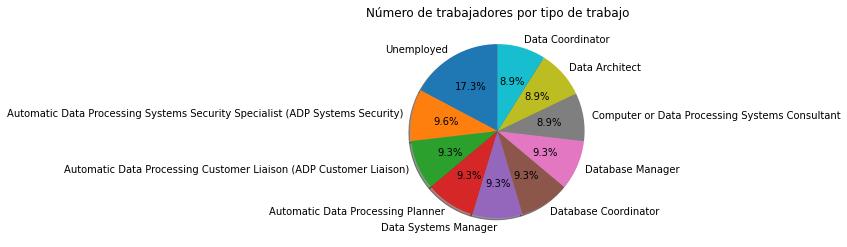

In [55]:
plt.pie(df_max1["Quantity"], labels=df_max1["Job Title"], 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Número de trabajadores por tipo de trabajo')
plt.show()

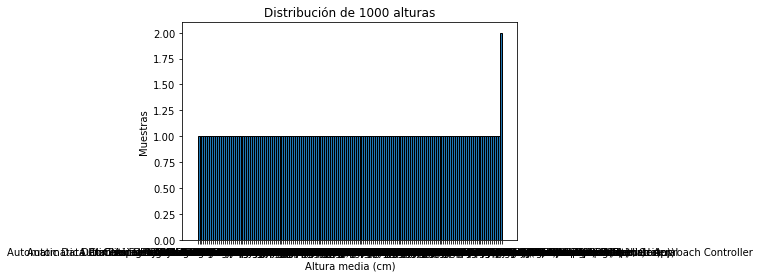

In [44]:
plt.hist(df_1["Job Title"], bins=156, edgecolor='black')
plt.title("Distribución de 1000 alturas")
plt.xlabel("Altura media (cm)")
plt.ylabel("Muestras")
plt.show()